# Ungraded Lab: Using Callbacks to Control Training
In this lab, you will use the Callbacks API to stop training when a specified metric is met. This is a useful feature so you won't need to complete all epochs when this threshold is reached. For example, if you set 1000 epochs and your desired accuracy is already reached at epoch 200, then the training will automatically stop. Let's see how this is implemented in the next sections.

# load and normalize the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=tf.keras.datasets.fashion_mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)=data.load_data()

In [4]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [5]:
np.set_printoptions(linewidth=350)

In [6]:
print(xtrain[0])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

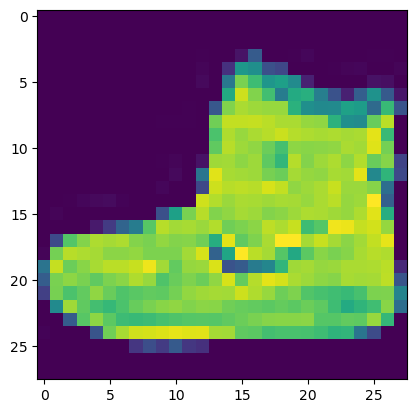

In [7]:
plt.imshow(xtrain[0])

In [35]:
class myCallback(tf.keras.callbacks.Callback):
    def on_batch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.20):
            print('\n Loss is lower than 0.2 so cancelling training!')
            self.model.stop_training =True
callbacks=myCallback()

In [36]:
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ]
)
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(xtrain,ytrain,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4784 - accuracy: 0.8297
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8694
Epoch 3/10
   1/1875 [..............................] - ETA: 5s - loss: 0.2471 - accuracy: 0.9062
 Loss is lower than 0.2 so cancelling training!
1875/1875 [==============================] - 0s 2us/step - loss: 0.1968 - accuracy: 0.9375
